# <div style="background-color: #153B50; font-family: Trebuchet MS; color: #FFFFFF; padding: 5px; font-size: 150%; text-align: center; line-height: 1; border-radius: 10px 10px;">Titanic Survival Predictions</div>

---

### Challenge:

The Titanic's sinking is one of history's most well-known ship tragedies.

On April 15, 1912, during her maiden voyage, the RMS Titanic, known as the "unsinkable ship," crashed and sank after striking with an iceberg. Unfortunately, there were insufficient lifeboats to accommodate everyone on board, resulting in the deaths of 1502 of the 2224 passengers and crew.

Although luck plays a role in survival, it appears that certain groups of people are more likely to survive than others.

In this challenge, we will create a prediction model to answer the question, "What types of people are more likely to survive?" by employing passenger information (e.g., name, age, gender, socioeconomic status, etc.).

# <div style="background-color: #153B50; font-family: Trebuchet MS; color: #FFFFFF; padding: 12px; border-radius: 10px 10px;">Import Library Required</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from xgboost import XGBClassifier

sns.set()

import warnings
warnings.filterwarnings("ignore")

print("Module loaded")

Module loaded


# <div style="background-color: #153B50; font-family: Trebuchet MS; color: #FFFFFF; padding: 12px; border-radius: 10px 10px;">Data Cleaning</div>

In [2]:
# load data first
train_path = "/kaggle/input/titanic/train.csv"
train_df = pd.read_csv(train_path)

test_path = "/kaggle/input/titanic/test.csv"
test_df = pd.read_csv(test_path)

Check train_df and test_df datasets

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Dimension information from train_df and test_df dataframes

In [5]:
shape_train = train_df.shape
shape_test = test_df.shape

len_train = len(train_df)
len_test = len(test_df)
len_total = len_train + len_test

print(f"Train Shape: {shape_train}")
print(f"Test Shape: {shape_test}")
print(f"Train - Test %: {len_train/len_total*100:.2f}% - {len_test/len_total*100:.2f}%")

Train Shape: (891, 12)
Test Shape: (418, 11)
Train - Test %: 68.07% - 31.93%


In [6]:
# Delete the "Name" and "Ticket" columns
# because it is considered less useful in model formation

to_drop = ["Name", "Ticket"]

train_df.drop(columns= to_drop, inplace= True)
test_df.drop(columns= to_drop, inplace= True)

shape_train = train_df.shape
shape_test = test_df.shape
print(f"Train Shape: {shape_train}")
print(f"Test Shape: {shape_test}")

Train Shape: (891, 10)
Test Shape: (418, 9)


# <div style="background-color: #153B50; font-family: Trebuchet MS; color: #FFFFFF; padding: 12px; border-radius: 10px 10px;">EDA</div>

In [7]:
# train_df dataframe information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [8]:
# test_df dataframe information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [9]:
# Check for missing values in train_df
# If possible, fill in the missing values
# If not, delete data that has missing values

train_miss_prob = round(train_df.isna().mean()*100)
train_miss = train_df.isna().sum()

train_miss_df = pd.DataFrame(
    {
        "Total Missing": train_miss,
        "Persentase Missing": train_miss_prob,
    }
)

train_miss_df["Persentase Missing"] = train_miss_df["Persentase Missing"].astype(int)

train_miss_df.T

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Total Missing,0,0,0,0,177,0,0,0,687,2
Persentase Missing,0,0,0,0,20,0,0,0,77,0


In [10]:
# Check for missing values in test_df
# If possible, fill in the missing values
# If not, delete data that has missing values

test_miss_prob = round(test_df.isna().mean()*100)
test_miss = test_df.isna().sum()

test_miss_df = pd.DataFrame(
    {
        "Total Missing": test_miss,
        "Persentase Missing": test_miss_prob,
    }
)

test_miss_df["Persentase Missing"] = test_miss_df["Persentase Missing"].astype(int)

test_miss_df.T

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Total Missing,0,0,0,86,0,0,1,327,0
Persentase Missing,0,0,0,21,0,0,0,78,0


In [11]:
# Remove "Cabin" column from train_df & test_df
# because it has too many missing values

train_df.drop(columns= "Cabin", axis= 1, inplace= True)
test_df.drop(columns= "Cabin", axis= 1, inplace= True)

print(f"Train-test shape: {train_df.shape}-{test_df.shape}")

Train-test shape: (891, 9)-(418, 8)


In [12]:
# Fill in the "Embarked" and "Fare" columns that have missing values

train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])

test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].mean())

**Note**: the "Age" column in train_df and test_df will be filled with null values.

In [13]:
# Fill in the value for "Age" using the mean

train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())

In [14]:
# Function for EDA plotting
def plot_graph(
    df,        # DataFrame
    col_list,  # Column list
    d_type,    # Datatype
    plot_mode, # "hue_target" or "none"
):
    
    plt.figure(figsize= (12, 10))
    for i, col in enumerate(col_list):
        plt.subplot(4, 2, i+1)
        
        # Hue with label
        if plot_mode == "hue_target":
            if d_type != "object":
                sns.histplot(
                    data= df,
                    x= col,
                    kde= True,
                    hue= "Survived"
                )
            else:
                sns.countplot(
                    data= df,
                    x= col,
                    hue= "Survived"
                )
        
        # Not a hue with a label
        else:
            if d_type != "object":
                sns.histplot(
                    data= df,
                    x= col,
                    kde= True,
                )    
            else:
                sns.countplot(
                    data= df,
                    x= col,
                )
        
        plt.title(f"distribution {col}", fontweight= "bold")
    plt.tight_layout()

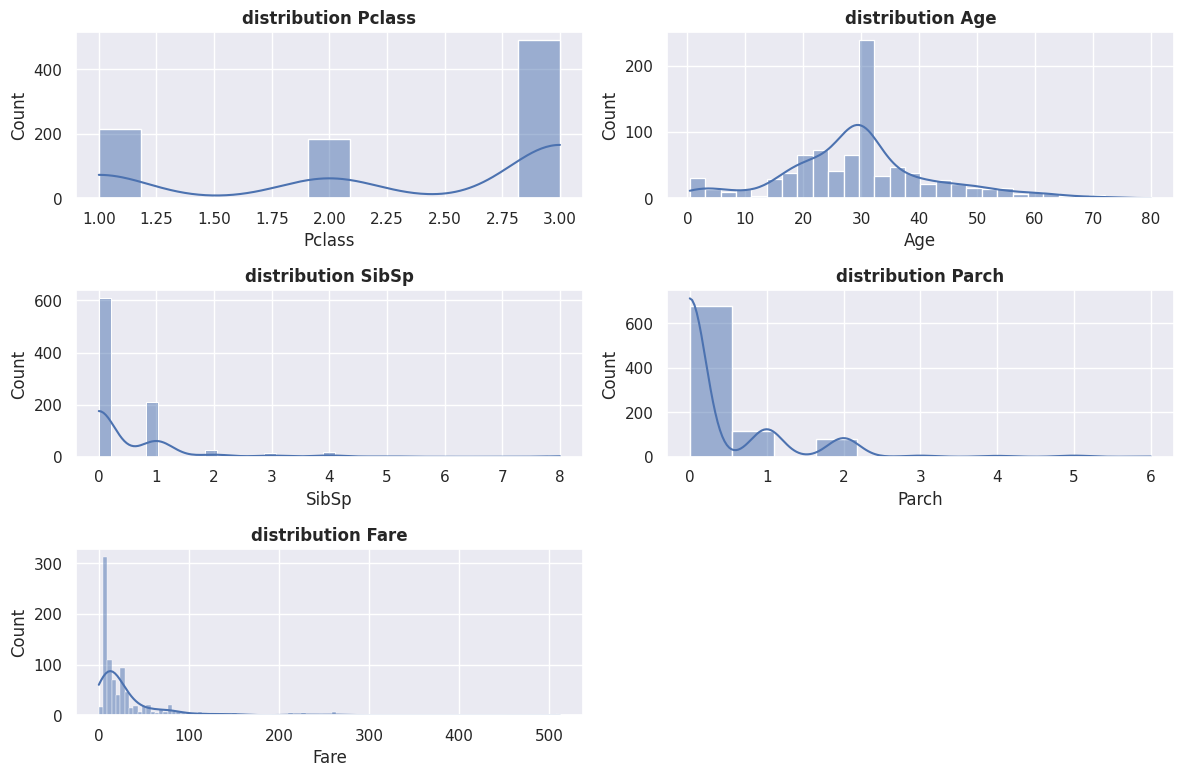

In [15]:
# Plot distribution for numeric columns (train_df)

numeric_col_train = [col for col in train_df if (train_df[col].dtype != "object") & (col != "PassengerId") & (col != "Survived")]

plot_graph(train_df, numeric_col_train, "numeric", "none")

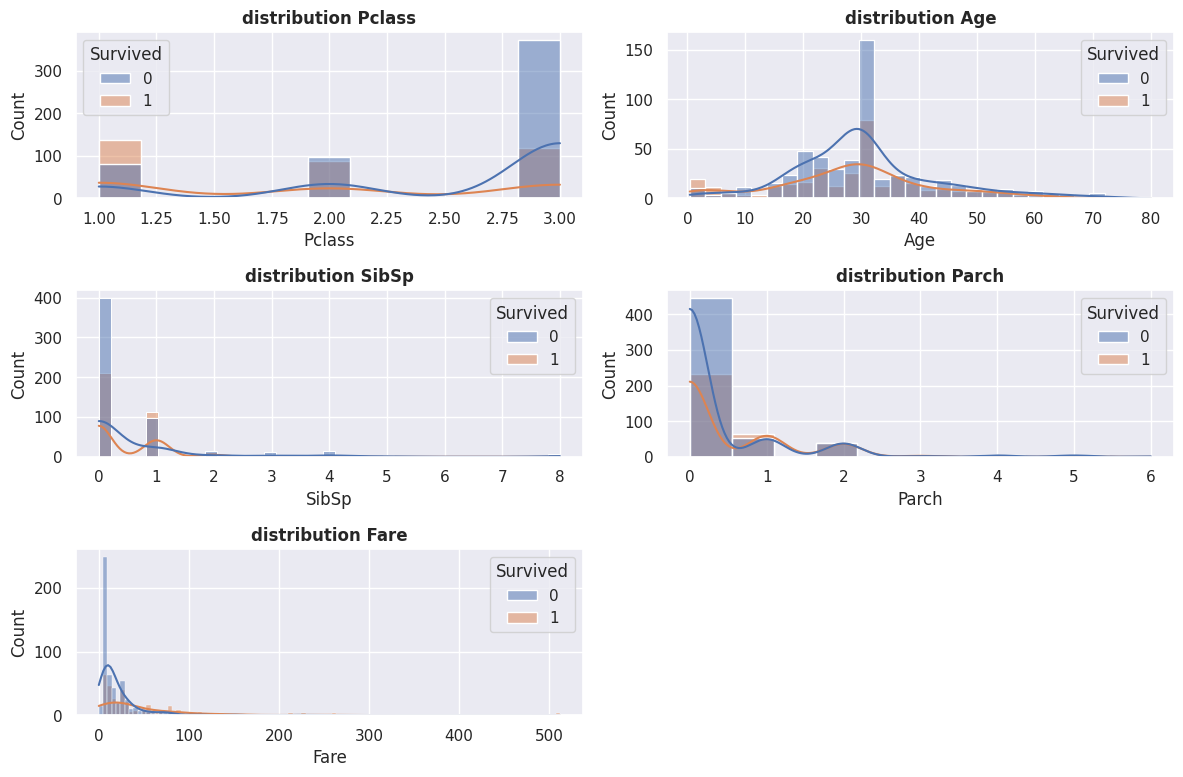

In [16]:
# Distribution plot for numeric columns with hue labels (train_df)

numeric_col_train = [col for col in train_df if (train_df[col].dtype != "object") & (col != "PassengerId") & (col != "Survived")]

plot_graph(train_df, numeric_col_train, "numeric", "hue_target")

**Notes**:

1. Class 1 passengers are more likely to survive.

2. Passengers aged 0-9 years have a higher chance of survival (most likely because they are prioritized when determining who gets into the lifeboat).

3. Passengers with family are slightly more likely to survive.

4. Passengers who pay more are more likely to survive.

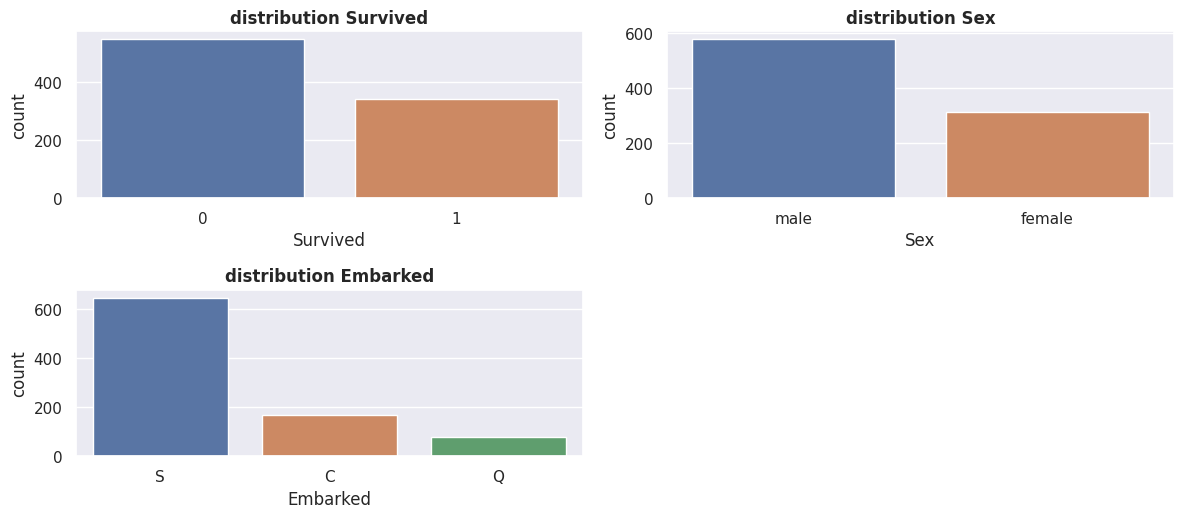

In [17]:
# Plot distribution for object column (train_df)

object_col_train = [col for col in train_df if (train_df[col].dtype == "object") | (col == "Survived")]

plot_graph(train_df, object_col_train, "object", "none")

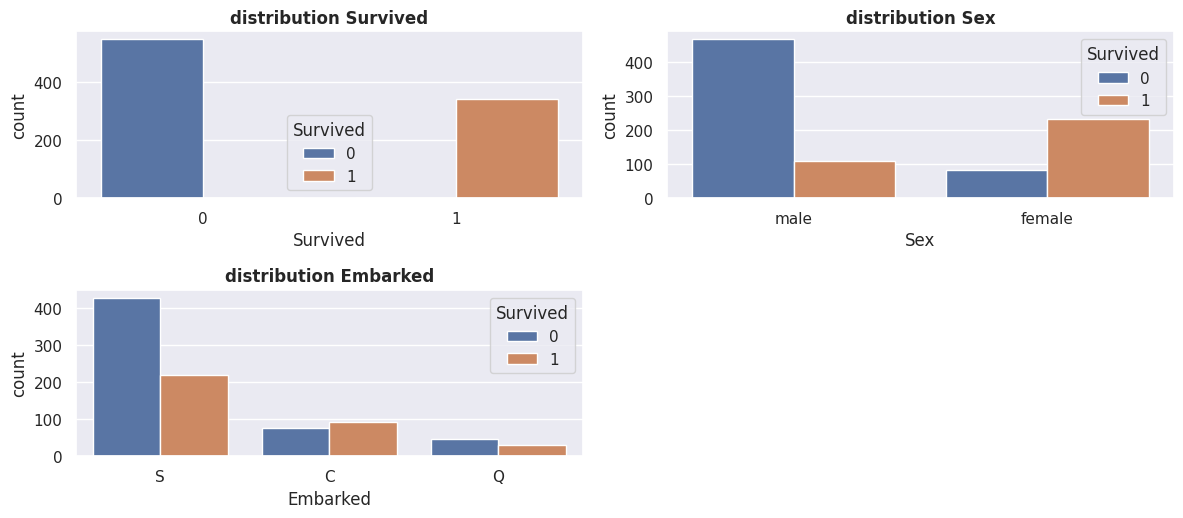

In [18]:
# Distribution plot for object column with hue label (train_df)

object_col_train = [col for col in train_df if (train_df[col].dtype == "object") | (col == "Survived")]

plot_graph(train_df, object_col_train, "object", "hue_target")

1. Female passengers have a much greater chance of survival when compared to male passengers (this is likely because female passengers are given priority when deciding who gets into the lifeboat first).

2. People who depart ("Embarked") from the port of Cherbourg have a greater chance of surviving.

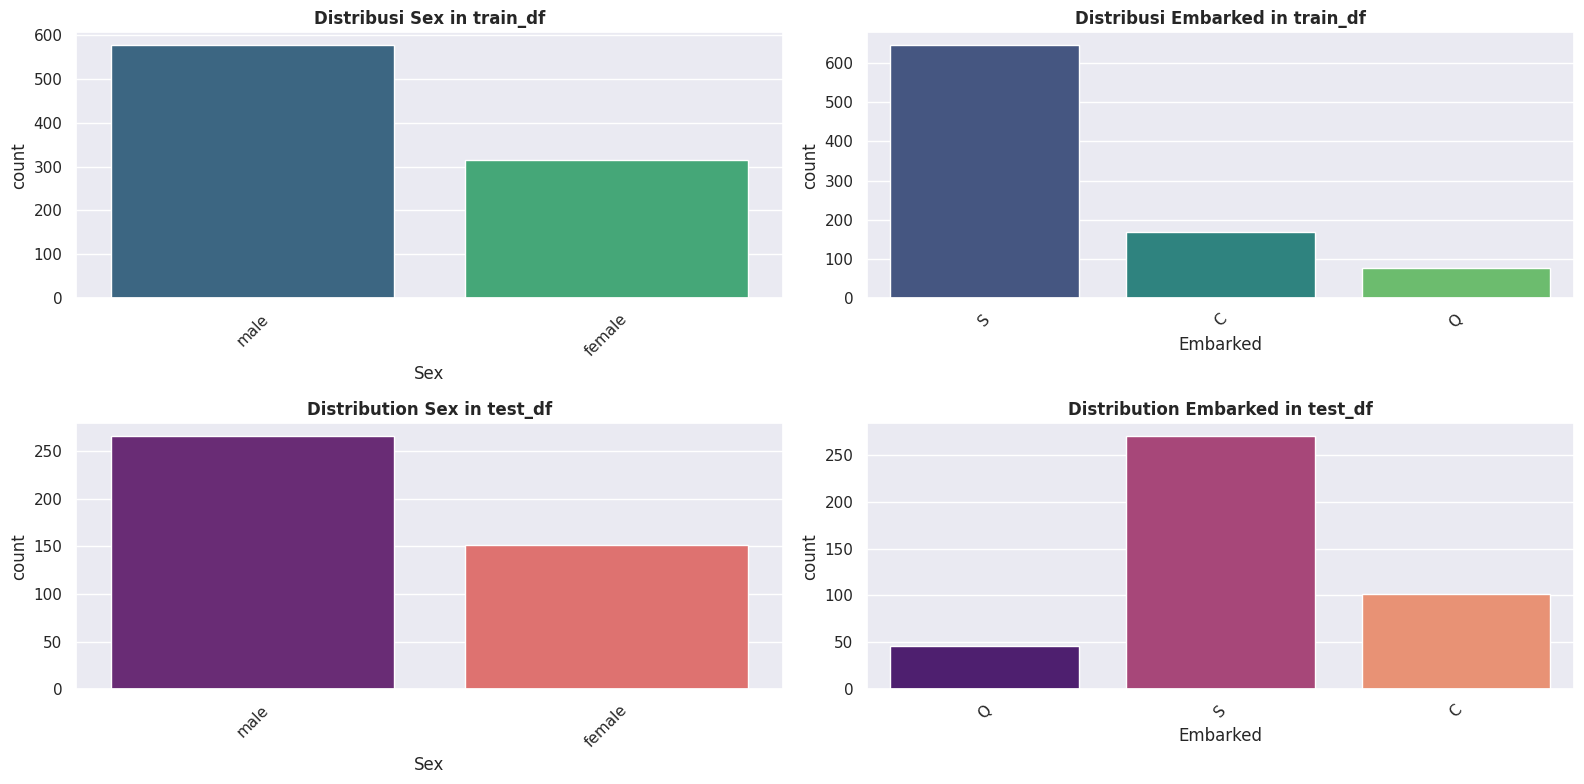

In [19]:
# Distribution plot for object column (train_df & test_df)

object_col_train = [col for col in train_df.columns if train_df[col].dtype == "object"]

plt.figure(figsize= (16, 8))
for i, col in enumerate(object_col_train):
    plt.subplot(2, len(object_col_train), i+1)
    sns.countplot(data= train_df, x= col, palette= "viridis")
    plt.title(f"Distribusi {col} in train_df", fontweight= "bold")
    plt.xticks(rotation= 45)
    plt.subplot(2, len(object_col_train), len(object_col_train) + i + 1)
    sns.countplot(data= test_df, x= col, palette= "magma")
    plt.title(f"Distribution {col} in test_df", fontweight= "bold")
    plt.xticks(rotation= 45)  

plt.tight_layout()
plt.show()

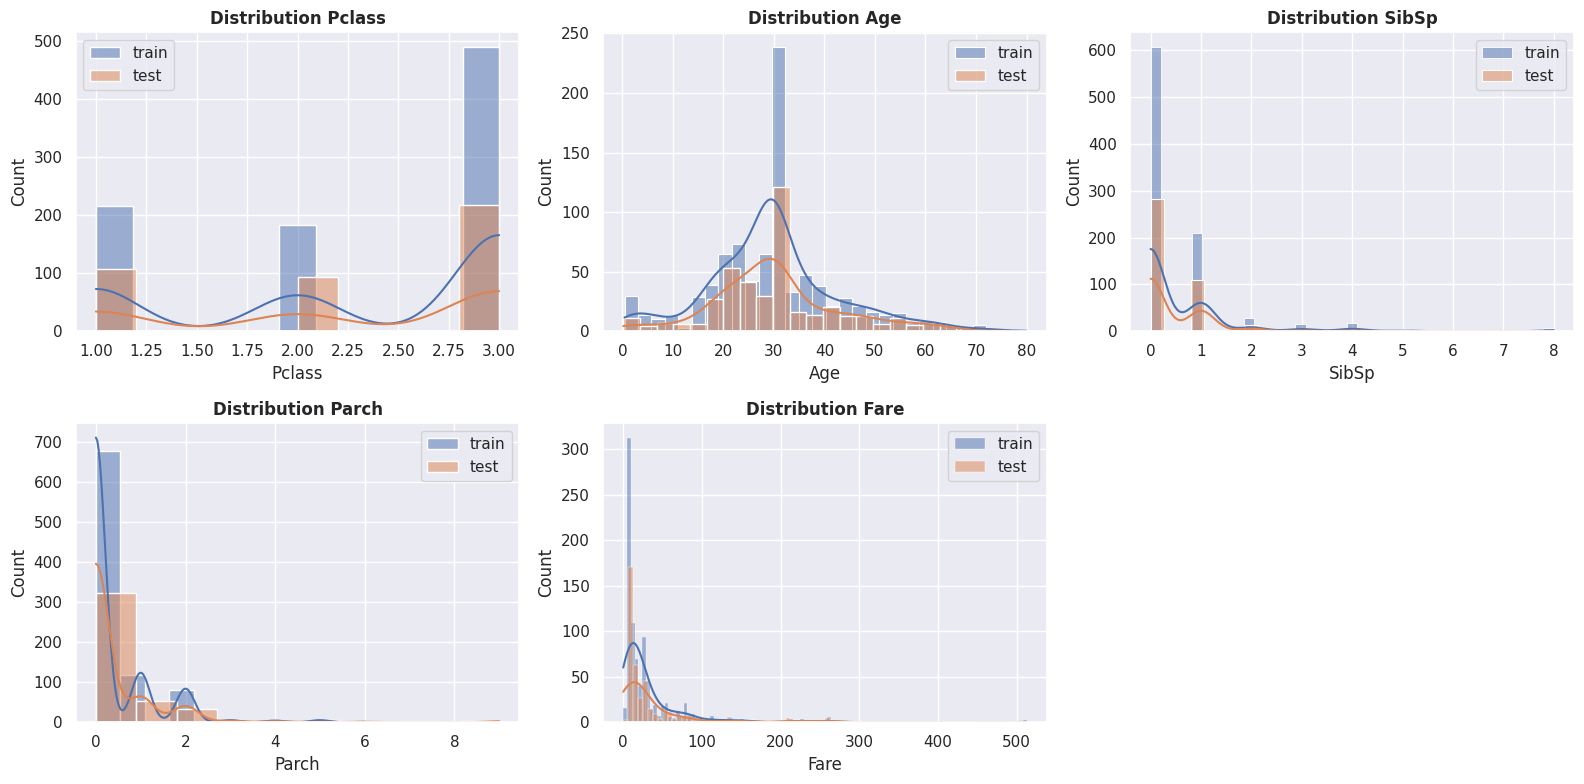

In [20]:
# Plot distribution for numeric columns (train_df & test_df)

numeric_col_train = [col for col in train_df.columns if (train_df[col].dtype != "object") & (col != "PassengerId") & (col != "Survived")]

plt.figure(figsize= (16, 8))
for i, col in enumerate(numeric_col_train):
    plt.subplot(2, 3, i+1)
    sns.histplot(data= train_df, x= col, palette= "viridis", label= "train", kde= True)
    sns.histplot(data= test_df, x= col, palette= "magma", label= "test", kde= True)
    plt.legend()
    plt.title(f"Distribution {col}", fontweight= "bold")
plt.tight_layout()
plt.show()

**Notes**:

DataFrame train_df has outliers in columns "SibSp", "Parch", and "Fare". However, test_df also has data in that range. Therefore, it is recommended not to remove outliers from these columns. By letting the model learn from these oulier data, there is potential for increased accuracy when predicting on the test_df dataset.

In [21]:
# Feature engineering for train_df and test_df

train_df['total_relative'] = train_df['SibSp'] + train_df['Parch']
test_df['total_relative'] = test_df['SibSp'] + test_df['Parch']

print(f'train_df - test_df shape: {train_df.shape} - {test_df.shape}.')

train_df - test_df shape: (891, 10) - (418, 9).


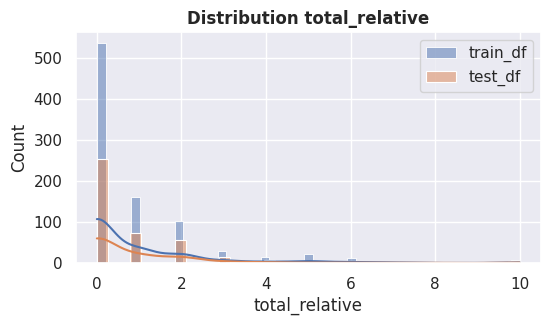

In [22]:
# Check Feature Engineering
plt.figure(figsize= (6, 3))

sns.histplot(data= train_df, x= "total_relative", kde= True, label= "train_df")
sns.histplot(data= test_df, x= "total_relative", kde= True, label= "test_df")

plt.legend()
plt.title("Distribution total_relative", fontweight= "bold")
plt.show()

# <div style="background-color: #153B50; font-family: Trebuchet MS; color: #FFFFFF; padding: 12px; border-radius: 10px 10px;">Modelling</div>

In [23]:
# One-hot encoding (train_df & test_df)

encode_col = [col for col in train_df if train_df[col].dtype == "object"]

encoded_train = pd.get_dummies(train_df[encode_col], drop_first= True)
train_df = pd.concat([encoded_train, train_df], axis= 1)

encoded_test = pd.get_dummies(test_df[encode_col], drop_first= True)
test_df = pd.concat([encoded_test, test_df], axis= 1)

In [24]:
# Drop original columns

train_df.drop(columns= encode_col, axis= 1, inplace= True)
test_df.drop(columns= encode_col, axis= 1, inplace= True)

In [25]:
# Splitting X & y

X = np.array(train_df.drop(columns= ["PassengerId", "Survived"], axis= 1))
y = np.array(train_df["Survived"])

In [26]:
# Train & val Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [27]:
X_test = test_df.drop(columns= "PassengerId", axis= 1).values

In [28]:
# Create an XGBoost model and train the model

model = XGBClassifier(
    n_estimators= 70,
    max_depth= 10,
    learning_rate= 0.1,
    subsample= 0.9,
    colsample_bytree= 0.9,
)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# <div style="background-color: #153B50; font-family: Trebuchet MS; color: #FFFFFF; padding: 12px; border-radius: 10px 10px;">Report</div>

In [29]:
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [30]:
X_test_pred = model.predict(X_test)
test_df["Survived"] = X_test_pred

In [31]:
submit = test_df[["PassengerId", "Survived"]]
submit["PassengerId"] = submit["PassengerId"].astype(int)
submit.to_csv("submission.csv", index= False)

From these results, we can conclude that the model tends to be better at predicting class 0 (not surviving) than class 1 (surviving), especially in terms of recall. This may be caused by an imbalance in the amount of data between class 0 and class 1. In addition, although the overall accuracy is quite good, we may need to make some further adjustments or customizations to the model or features to improve the prediction performance of the minority class (class 1).